In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('education2020.csv')

## 데이터 전처리

In [3]:
df

,Unnamed: 0,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year
0,0,2020,G1,10000112,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16
1,1,2020,G1,10000132,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21
2,2,2020,G1,10000162,2,73,1,2,3,5712,0,908,725,T,4,2,6
3,3,2020,G1,10000182,1,58,2,4,2,14870,0,2748,2431,C,5,2,12
4,4,2020,G1,10000192,2,27,1,4,1,814,0,1015,893,R,2,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3,16
18060,18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1,16
18061,18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16
18062,18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2,18


In [4]:
# 같은 사람은 없는 것을 확인할 수 있다
df.id.value_counts()

10000112     1
642900341    1
650000272    1
650000212    1
650000202    1
            ..
320000292    1
320000302    1
320000312    1
320000322    1
995800261    1
Name: id, Length: 18064, dtype: int64

In [5]:
df=df.drop(['Unnamed: 0','id','year'],axis=1)
df

,metro,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year
0,G1,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16
1,G1,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21
2,G1,2,73,1,2,3,5712,0,908,725,T,4,2,6
3,G1,1,58,2,4,2,14870,0,2748,2431,C,5,2,12
4,G1,2,27,1,4,1,814,0,1015,893,R,2,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,G2,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3,16
18060,G2,1,49,5,6,2,130180,22000,15454,11784,O,3,1,16
18061,G2,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16
18062,G2,2,53,2,7,4,109695,25000,9114,7074,O,2,2,18


**categorical data와 numerical data를 확인하자**  
categorical data : metro, sex, number, education, marriage, industry, job, house  
numerical data : age, asset, debt, income, income_d, education_year

In [6]:
df.metro.value_counts()

G2    12170
G1     5894
Name: metro, dtype: int64

In [7]:
df.education.value_counts()

4    5681
6    4120
2    2392
3    2024
5    1918
1     928
7     797
8     204
Name: education, dtype: int64

In [8]:
df.age.value_counts()

60     504
59     504
58     445
62     443
61     443
      ... 
96       3
97       2
20       2
98       1
102      1
Name: age, Length: 80, dtype: int64

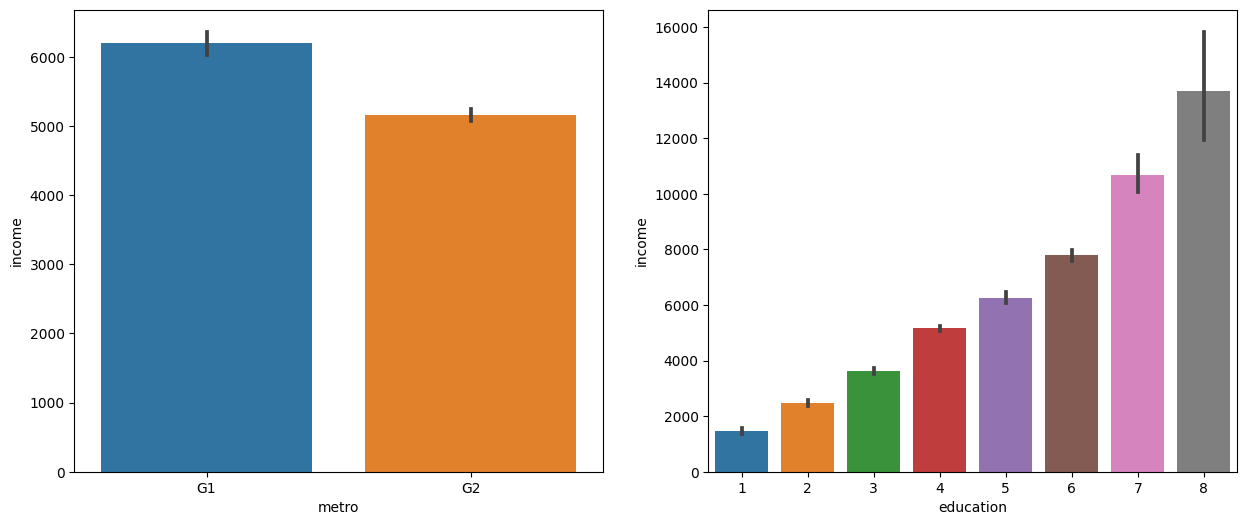

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='metro', y='income',data=df)
plt.subplot(1,2,2)
sns.barplot(x='education', y='income',data=df)
plt.show()

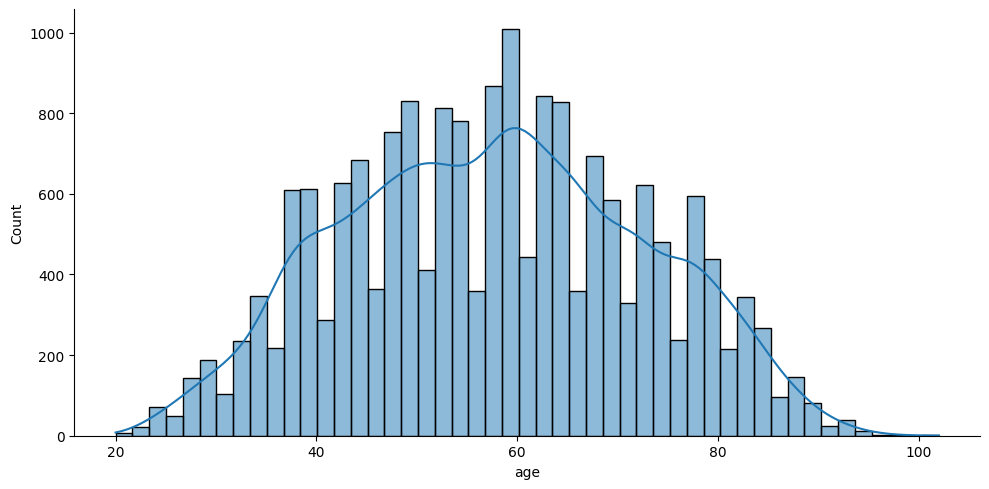

In [10]:
sns.displot(df.age, height=5, aspect=2, kde=True)
plt.show()

In [11]:
df['log_income']=np.log(df['income'])
df['log_asset']=np.log(df['asset'])
df['log_debt']=np.log(df['debt'])

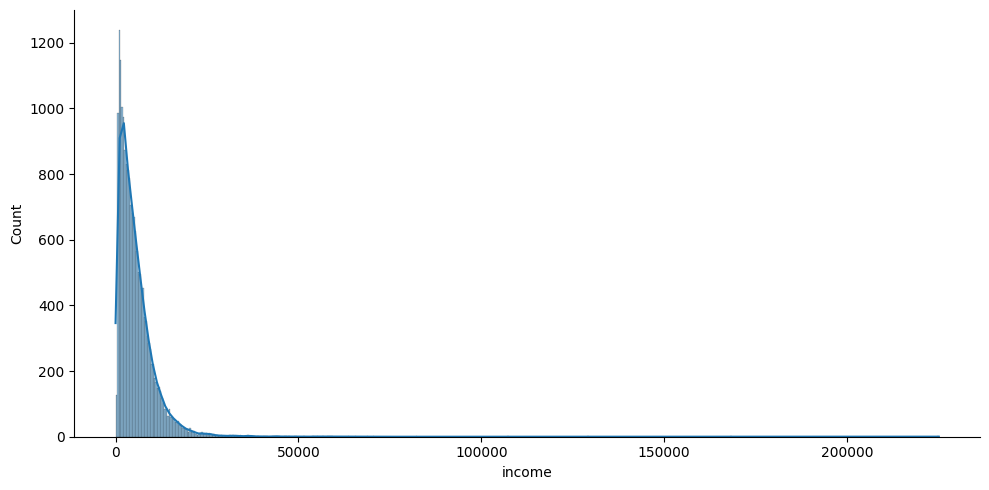

In [12]:
sns.displot(df.income, height=5, aspect=2, kde=True)
plt.show()

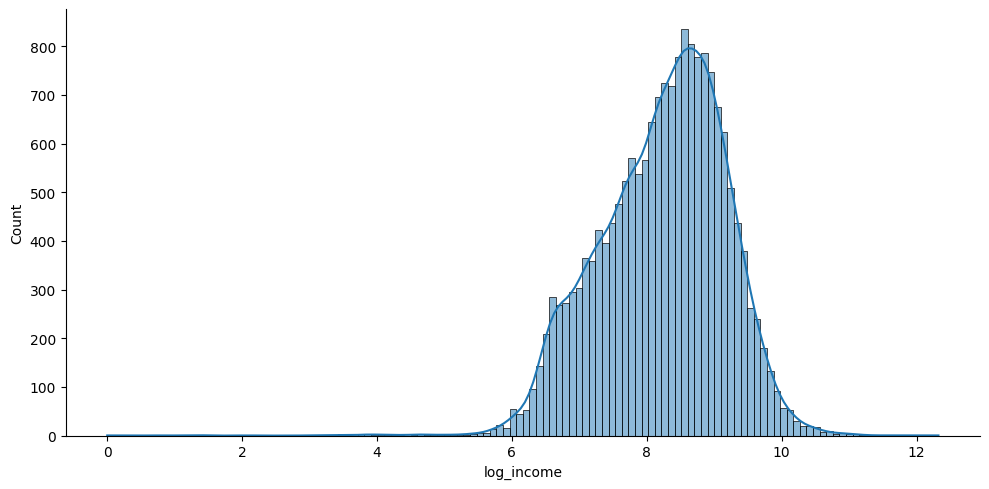

In [13]:
sns.displot(df.log_income, height=5, aspect=2, kde=True)
plt.show()

In [14]:
df['log_debt']=np.log(df['debt'])
df[df['debt']<=0][['debt','log_debt']]

,debt,log_debt
2,0,-inf
3,0,-inf
4,0,-inf
9,0,-inf
10,0,-inf
...,...,...
18050,0,-inf
18051,0,-inf
18052,0,-inf
18054,0,-inf


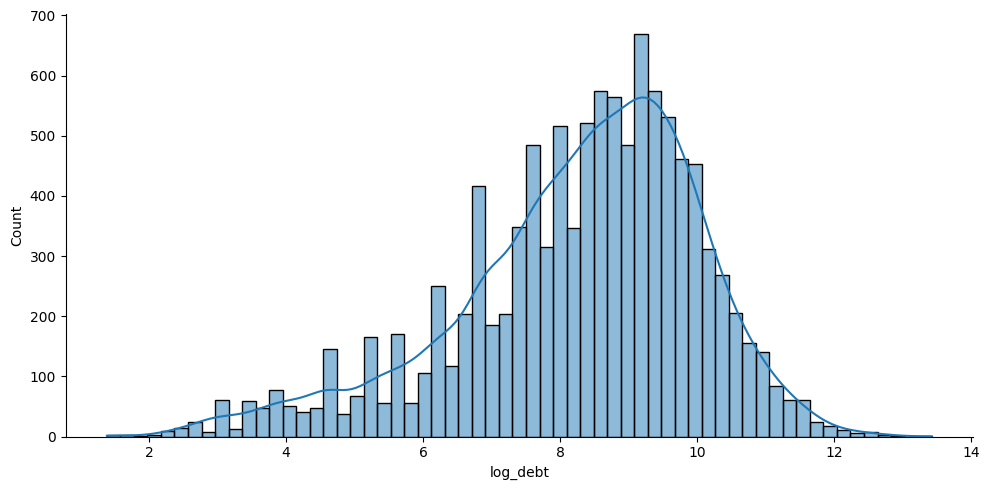

In [15]:
sns.displot(df.log_debt, height=5, aspect=2, kde=True)
plt.show()

In [16]:
df['log_debt']=np.log(df['debt']+abs(df['debt'].min()+1))
df[df['debt']<=0][['debt','log_debt']]

,debt,log_debt
2,0,0.0
3,0,0.0
4,0,0.0
9,0,0.0
10,0,0.0
...,...,...
18050,0,0.0
18051,0,0.0
18052,0,0.0
18054,0,0.0


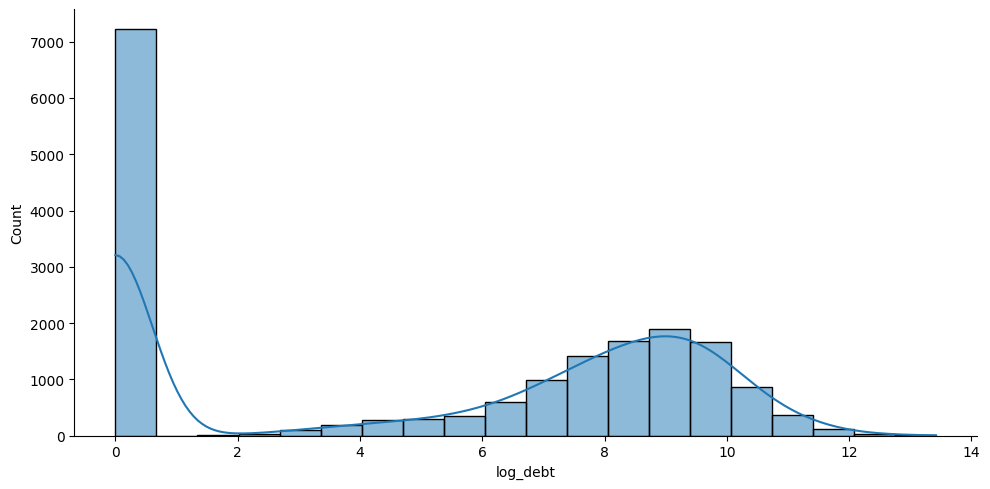

In [17]:
sns.displot(df.log_debt, height=5, aspect=2, kde=True)
plt.show()

In [18]:
df['h_debt']=0
df.loc[df['debt']>0, 'h_debt']=1
df

,metro,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year,log_income,log_asset,log_debt,h_debt
0,G1,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16,8.793764,11.626254,10.905974,1
1,G1,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21,9.782449,10.657259,9.770013,1
2,G1,2,73,1,2,3,5712,0,908,725,T,4,2,6,6.811244,8.650325,0.000000,0
3,G1,1,58,2,4,2,14870,0,2748,2431,C,5,2,12,7.918629,9.607101,0.000000,0
4,G1,2,27,1,4,1,814,0,1015,893,R,2,3,12,6.922644,6.701960,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,G2,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3,16,5.187386,8.810609,7.696667,1
18060,G2,1,49,5,6,2,130180,22000,15454,11784,O,3,1,16,9.645623,11.776673,9.998843,1
18061,G2,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16,9.622318,12.488338,10.275086,1
18062,G2,2,53,2,7,4,109695,25000,9114,7074,O,2,2,18,9.117567,11.605459,10.126671,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   metro           18064 non-null  object 
 1   sex             18064 non-null  int64  
 2   age             18064 non-null  int64  
 3   number          18064 non-null  int64  
 4   education       18064 non-null  int64  
 5   marriage        18064 non-null  int64  
 6   asset           18064 non-null  int64  
 7   debt            18064 non-null  int64  
 8   income          18064 non-null  int64  
 9   income_d        18064 non-null  int64  
 10  industry        13214 non-null  object 
 11  job             13214 non-null  object 
 12  house           18064 non-null  int64  
 13  education_year  18064 non-null  int64  
 14  log_income      18064 non-null  float64
 15  log_asset       18064 non-null  float64
 16  log_debt        18064 non-null  float64
 17  h_debt          18064 non-null 

In [20]:
# 데이터 결측치 확인
df.isnull().sum()

metro                0
sex                  0
age                  0
number               0
education            0
marriage             0
asset                0
debt                 0
income               0
income_d             0
industry          4850
job               4850
house                0
education_year       0
log_income           0
log_asset            0
log_debt             0
h_debt               0
dtype: int64

industry와 job에 4850개의 공통적인 결측치가 확인되었다.  
18064개 중 4850은 꽤 비중이 크기 때문에 무시할 수 없는 데이터이다.  
해당 데이터만 추출하여 확인을 해보자

In [21]:
(df.values==' ').sum()

0

In [22]:
df=df[df.income_d>=0]
df

,metro,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year,log_income,log_asset,log_debt,h_debt
0,G1,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16,8.793764,11.626254,10.905974,1
1,G1,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21,9.782449,10.657259,9.770013,1
2,G1,2,73,1,2,3,5712,0,908,725,T,4,2,6,6.811244,8.650325,0.000000,0
3,G1,1,58,2,4,2,14870,0,2748,2431,C,5,2,12,7.918629,9.607101,0.000000,0
4,G1,2,27,1,4,1,814,0,1015,893,R,2,3,12,6.922644,6.701960,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,G2,1,37,4,6,2,13720,4100,7453,6083,C,2,3,16,8.916372,9.526610,8.318986,1
18060,G2,1,49,5,6,2,130180,22000,15454,11784,O,3,1,16,9.645623,11.776673,9.998843,1
18061,G2,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16,9.622318,12.488338,10.275086,1
18062,G2,2,53,2,7,4,109695,25000,9114,7074,O,2,2,18,9.117567,11.605459,10.126671,1


In [23]:
df=df.fillna('NaN')
df

,metro,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year,log_income,log_asset,log_debt,h_debt
0,G1,1,34,3,6,2,112000,54500,6593,4599,F,3,2,16,8.793764,11.626254,10.905974,1
1,G1,2,45,2,8,2,42500,17500,17720,15257,J,2,3,21,9.782449,10.657259,9.770013,1
2,G1,2,73,1,2,3,5712,0,908,725,T,4,2,6,6.811244,8.650325,0.000000,0
3,G1,1,58,2,4,2,14870,0,2748,2431,C,5,2,12,7.918629,9.607101,0.000000,0
4,G1,2,27,1,4,1,814,0,1015,893,R,2,3,12,6.922644,6.701960,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,G2,1,37,4,6,2,13720,4100,7453,6083,C,2,3,16,8.916372,9.526610,8.318986,1
18060,G2,1,49,5,6,2,130180,22000,15454,11784,O,3,1,16,9.645623,11.776673,9.998843,1
18061,G2,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16,9.622318,12.488338,10.275086,1
18062,G2,2,53,2,7,4,109695,25000,9114,7074,O,2,2,18,9.117567,11.605459,10.126671,1


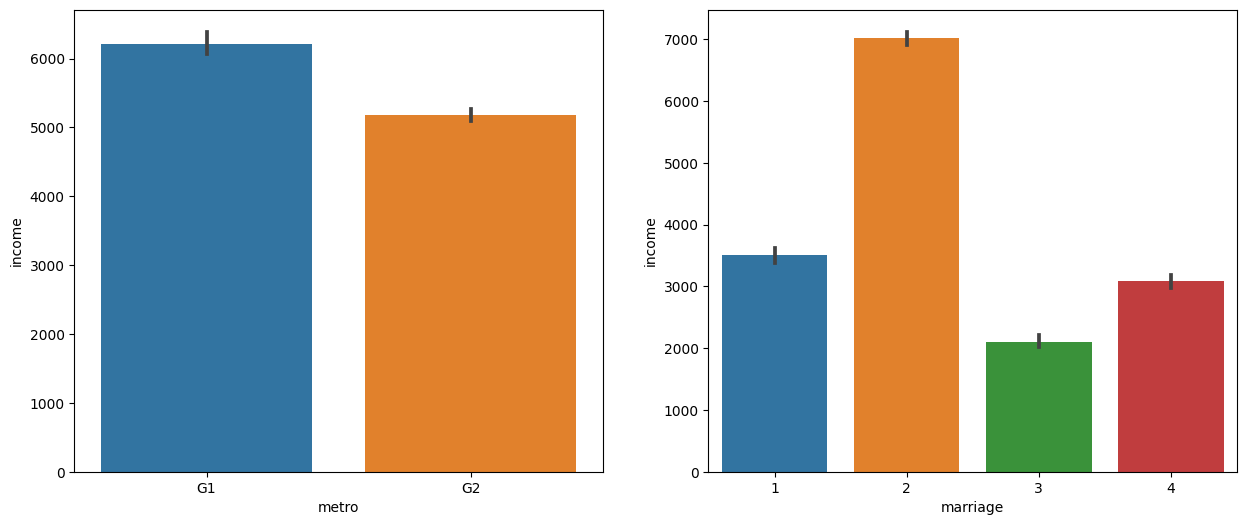

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='metro', y='income',data=df)
plt.subplot(1,2,2)
sns.barplot(x='marriage', y='income',data=df)
plt.show()

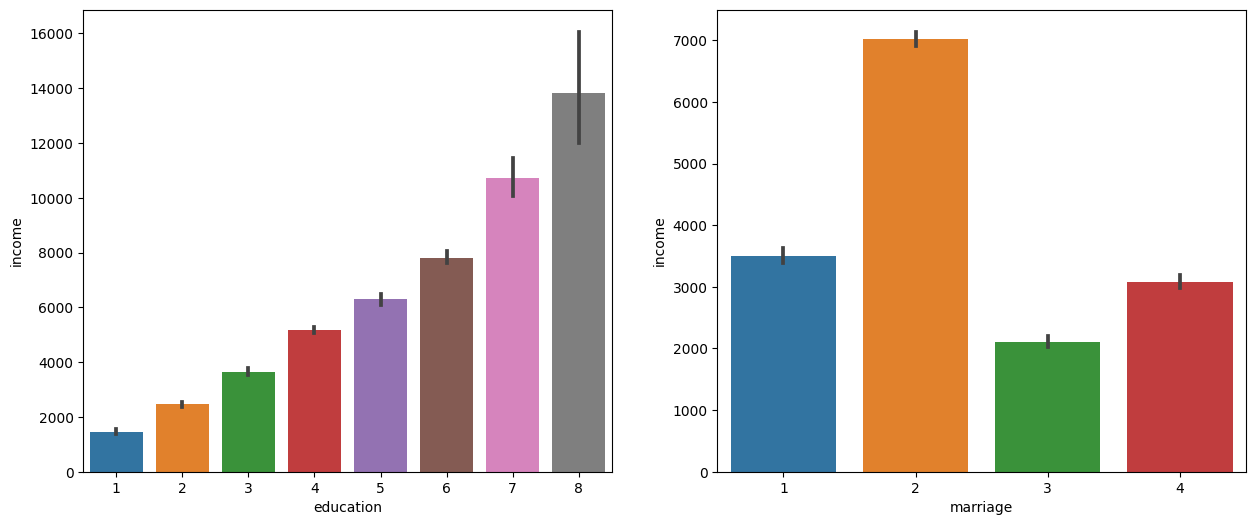

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='education', y='income',data=df)
plt.subplot(1,2,2)
sns.barplot(x='marriage', y='income',data=df)
plt.show()

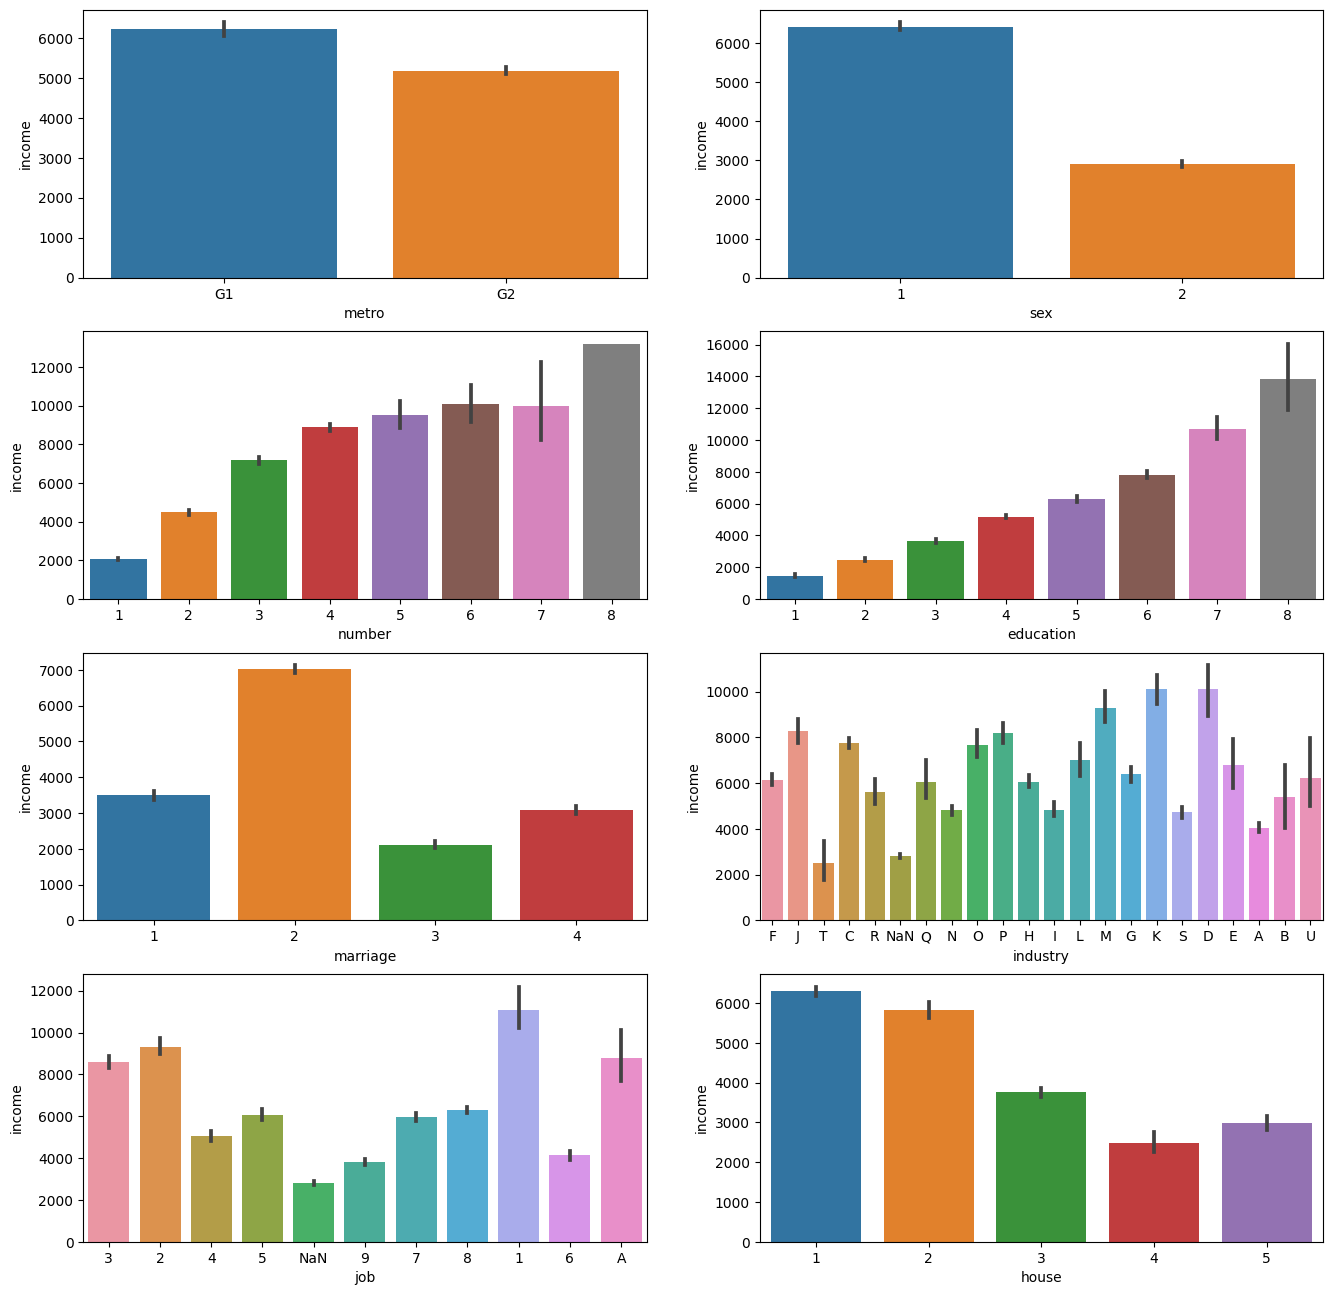

In [26]:
# categorical data 시각화
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)
sns.barplot(x='metro', y='income',data=df)
plt.subplot(4,2,2)
sns.barplot(x='sex', y='income',data=df)
plt.subplot(4,2,3)
sns.barplot(x='number', y='income',data=df)
plt.subplot(4,2,4)
sns.barplot(x='education', y='income',data=df)
plt.subplot(4,2,5)
sns.barplot(x='marriage', y='income',data=df)
plt.subplot(4,2,6)
sns.barplot(x='industry', y='income',data=df)
plt.subplot(4,2,7)
sns.barplot(x='job', y='income',data=df)
plt.subplot(4,2,8)
sns.barplot(x='house', y='income',data=df)
plt.show()

In [27]:
# label encoding
df=df.applymap(lambda x : 0 if x == 'G1' else(1 if x=='G2' else x))
df.sex=df.sex.apply(lambda x : 0 if x == 1 else(1 if x==2 else x))
df

,metro,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house,education_year,log_income,log_asset,log_debt,h_debt
0,0,0,34,3,6,2,112000,54500,6593,4599,F,3,2,16,8.793764,11.626254,10.905974,1
1,0,1,45,2,8,2,42500,17500,17720,15257,J,2,3,21,9.782449,10.657259,9.770013,1
2,0,1,73,1,2,3,5712,0,908,725,T,4,2,6,6.811244,8.650325,0.000000,0
3,0,0,58,2,4,2,14870,0,2748,2431,C,5,2,12,7.918629,9.607101,0.000000,0
4,0,1,27,1,4,1,814,0,1015,893,R,2,3,12,6.922644,6.701960,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,1,0,37,4,6,2,13720,4100,7453,6083,C,2,3,16,8.916372,9.526610,8.318986,1
18060,1,0,49,5,6,2,130180,22000,15454,11784,O,3,1,16,9.645623,11.776673,9.998843,1
18061,1,0,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1,16,9.622318,12.488338,10.275086,1
18062,1,1,53,2,7,4,109695,25000,9114,7074,O,2,2,18,9.117567,11.605459,10.126671,1


In [28]:
df=pd.get_dummies(data=df, columns=["marriage","industry","job","house"], drop_first=True)
df.columns

Index(['metro', 'sex', 'age', 'number', 'education', 'asset', 'debt', 'income',
       'income_d', 'education_year', 'log_income', 'log_asset', 'log_debt',
       'h_debt', 'marriage_2', 'marriage_3', 'marriage_4', 'industry_B',
       'industry_C', 'industry_D', 'industry_E', 'industry_F', 'industry_G',
       'industry_H', 'industry_I', 'industry_J', 'industry_K', 'industry_L',
       'industry_M', 'industry_N', 'industry_NaN', 'industry_O', 'industry_P',
       'industry_Q', 'industry_R', 'industry_S', 'industry_T', 'industry_U',
       'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9',
       'job_A', 'job_NaN', 'house_2', 'house_3', 'house_4', 'house_5'],
      dtype='object')

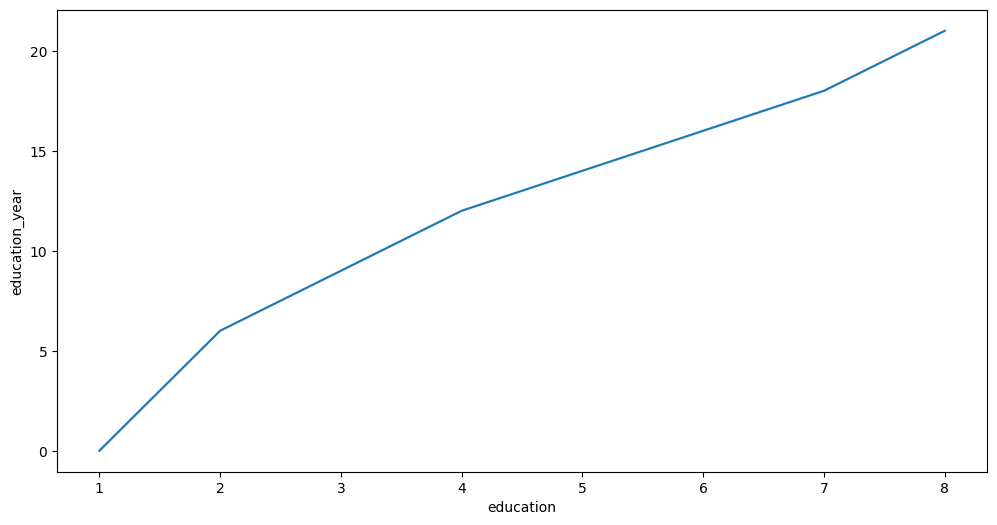

In [29]:
# education 과 education_year과의 상관관계
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='education', y='education_year')
plt.show()

In [30]:
df=df.drop(['education'],axis=1)
df

,metro,sex,age,number,asset,debt,income,income_d,education_year,log_income,...,job_6,job_7,job_8,job_9,job_A,job_NaN,house_2,house_3,house_4,house_5
0,0,0,34,3,112000,54500,6593,4599,16,8.793764,...,0,0,0,0,0,0,1,0,0,0
1,0,1,45,2,42500,17500,17720,15257,21,9.782449,...,0,0,0,0,0,0,0,1,0,0
2,0,1,73,1,5712,0,908,725,6,6.811244,...,0,0,0,0,0,0,1,0,0,0
3,0,0,58,2,14870,0,2748,2431,12,7.918629,...,0,0,0,0,0,0,1,0,0,0
4,0,1,27,1,814,0,1015,893,12,6.922644,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,1,0,37,4,13720,4100,7453,6083,16,8.916372,...,0,0,0,0,0,0,0,1,0,0
18060,1,0,49,5,130180,22000,15454,11784,16,9.645623,...,0,0,0,0,0,0,0,0,0,0
18061,1,0,57,5,265226,29000,15098,11560,16,9.622318,...,0,0,0,0,0,1,0,0,0,0
18062,1,1,53,2,109695,25000,9114,7074,18,9.117567,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df

,metro,sex,age,number,asset,debt,income,income_d,education_year,log_income,...,job_6,job_7,job_8,job_9,job_A,job_NaN,house_2,house_3,house_4,house_5
0,0,0,34,3,112000,54500,6593,4599,16,8.793764,...,0,0,0,0,0,0,1,0,0,0
1,0,1,45,2,42500,17500,17720,15257,21,9.782449,...,0,0,0,0,0,0,0,1,0,0
2,0,1,73,1,5712,0,908,725,6,6.811244,...,0,0,0,0,0,0,1,0,0,0
3,0,0,58,2,14870,0,2748,2431,12,7.918629,...,0,0,0,0,0,0,1,0,0,0
4,0,1,27,1,814,0,1015,893,12,6.922644,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,1,0,37,4,13720,4100,7453,6083,16,8.916372,...,0,0,0,0,0,0,0,1,0,0
18060,1,0,49,5,130180,22000,15454,11784,16,9.645623,...,0,0,0,0,0,0,0,0,0,0
18061,1,0,57,5,265226,29000,15098,11560,16,9.622318,...,0,0,0,0,0,1,0,0,0,0
18062,1,1,53,2,109695,25000,9114,7074,18,9.117567,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df.columns

Index(['metro', 'sex', 'age', 'number', 'asset', 'debt', 'income', 'income_d',
       'education_year', 'log_income', 'log_asset', 'log_debt', 'h_debt',
       'marriage_2', 'marriage_3', 'marriage_4', 'industry_B', 'industry_C',
       'industry_D', 'industry_E', 'industry_F', 'industry_G', 'industry_H',
       'industry_I', 'industry_J', 'industry_K', 'industry_L', 'industry_M',
       'industry_N', 'industry_NaN', 'industry_O', 'industry_P', 'industry_Q',
       'industry_R', 'industry_S', 'industry_T', 'industry_U', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_A',
       'job_NaN', 'house_2', 'house_3', 'house_4', 'house_5'],
      dtype='object')

In [33]:
df=df.drop(["income", "income_d", "asset", "debt"], axis=1)
df

,metro,sex,age,number,education_year,log_income,log_asset,log_debt,h_debt,marriage_2,...,job_6,job_7,job_8,job_9,job_A,job_NaN,house_2,house_3,house_4,house_5
0,0,0,34,3,16,8.793764,11.626254,10.905974,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,45,2,21,9.782449,10.657259,9.770013,1,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,73,1,6,6.811244,8.650325,0.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,58,2,12,7.918629,9.607101,0.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,27,1,12,6.922644,6.701960,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18058,1,0,37,4,16,8.916372,9.526610,8.318986,1,1,...,0,0,0,0,0,0,0,1,0,0
18060,1,0,49,5,16,9.645623,11.776673,9.998843,1,1,...,0,0,0,0,0,0,0,0,0,0
18061,1,0,57,5,16,9.622318,12.488338,10.275086,1,1,...,0,0,0,0,0,1,0,0,0,0
18062,1,1,53,2,18,9.117567,11.605459,10.126671,1,0,...,0,0,0,0,0,0,1,0,0,0


## 모델 생성

In [34]:
# 독립변수와 종속변수 분리
y=df.log_income
X=df.drop(['log_income'],axis=1)

In [35]:
# train 데이터와 test 데이터를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)       # random_state를 지정하면 랜덤으로 분리되는 걸 고정시킬 수 있다

In [36]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
X_train_con = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train_con)
result1 = model1.fit()

print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     619.3
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:53:42   Log-Likelihood:                -11090.
No. Observations:               14364   AIC:                         2.227e+04
Df Residuals:                   14318   BIC:                         2.262e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.7153      0.089     64.

In [37]:
# train 데이터와 test 데이터를 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)       # random_state를 지정하면 랜덤으로 분리되는 걸 고정시킬 수 있다

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14364, 46)
(3592, 46)
(14364,)
(3592,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

print("계수 : \n", model.coef_)
print("절편 : ", model.intercept_)
print('훈련 데이터의 점수 : {:.3f}'.format(model.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.3f}'. format(model.score(X_test, y_test)))

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : {:.3f}'.format(rmse))

계수 : 
 [ 0.00609121 -0.10085367 -0.00169604  0.18249919  0.02563307  0.197968
  0.01477281 -0.03665318  0.1538776  -0.01745897  0.02614209  0.07778902
  0.15468836  0.29824287  0.12639234  0.07071981  0.05344616  0.07398768
  0.00471209  0.10661679  0.31054841  0.01689709  0.08869458  0.05753454
 -0.25643559  0.13875193  0.09364169  0.03892982 -0.00951629 -0.06330281
 -0.15147514  0.19623833 -0.08326007 -0.12773271 -0.16750539 -0.2484087
 -0.37539492 -0.22238223 -0.16288028 -0.26711485 -0.18665647 -0.25643559
 -0.02354748  0.14633706  0.41692729  0.24591845]
절편 :  5.715322143862121
훈련 데이터의 점수 : 0.661
테스트 데이터의 점수 : 0.676
RMSE : 0.522


---

## 정규화

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#설명보기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [48]:
##정보성데이터 만들기
#열정보 : feature_names
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
sy = pd.Series(cancer.target, dtype="category")
sy = sy.cat.rename_categories(cancer.target_names) #정답레이블 매핑
df['class'] = sy #마지막 컬럼에 정답레이블
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [49]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

In [53]:
#전처리 안함
from sklearn.svm import SVC, SVR
svm = SVC(C=100)
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))

0.9440559440559441


In [54]:
#MinMax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)
print(svm.score(X_test_scaled, y_test))


0.965034965034965


In [55]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(svm.score(X_test_scaled, y_test))

0.958041958041958


In [56]:
#robust 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print(svm.score(X_test_scaled, y_test))


0.951048951048951
